In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.corr(numeric_only=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

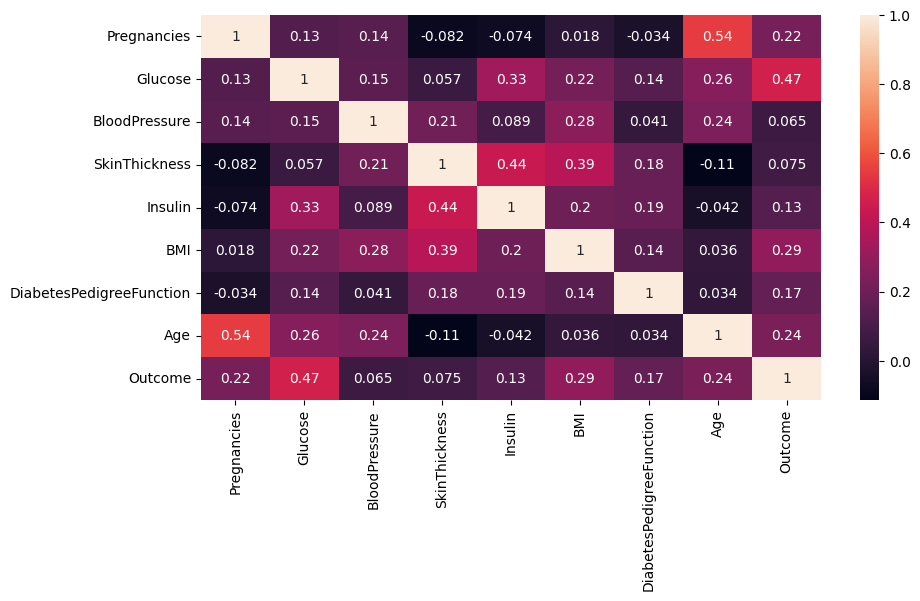

In [8]:
plt.figure(figsize=(10,5))
ax=sns.heatmap(df.corr(),annot=True)
ax

In [9]:
# We can clearly see that many columns have zero values,which is not practically possible for humans.So we need to do the data imputation.
#But first plot the distribution of the features to dicide the parameter(mean or median).
#Median is more robust to outliers

# Imputation

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

C:\Users\admin\AppData\Local\Temp\ipykernel_2108\221293323.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pregnancies'])
C:\Users\admin\AppData\Local\Temp\ipykernel_2108\221293323.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Glucose'])
C:\Users\admin\AppData\Local\Temp\ipyker

<Axes: xlabel='Age', ylabel='Density'>

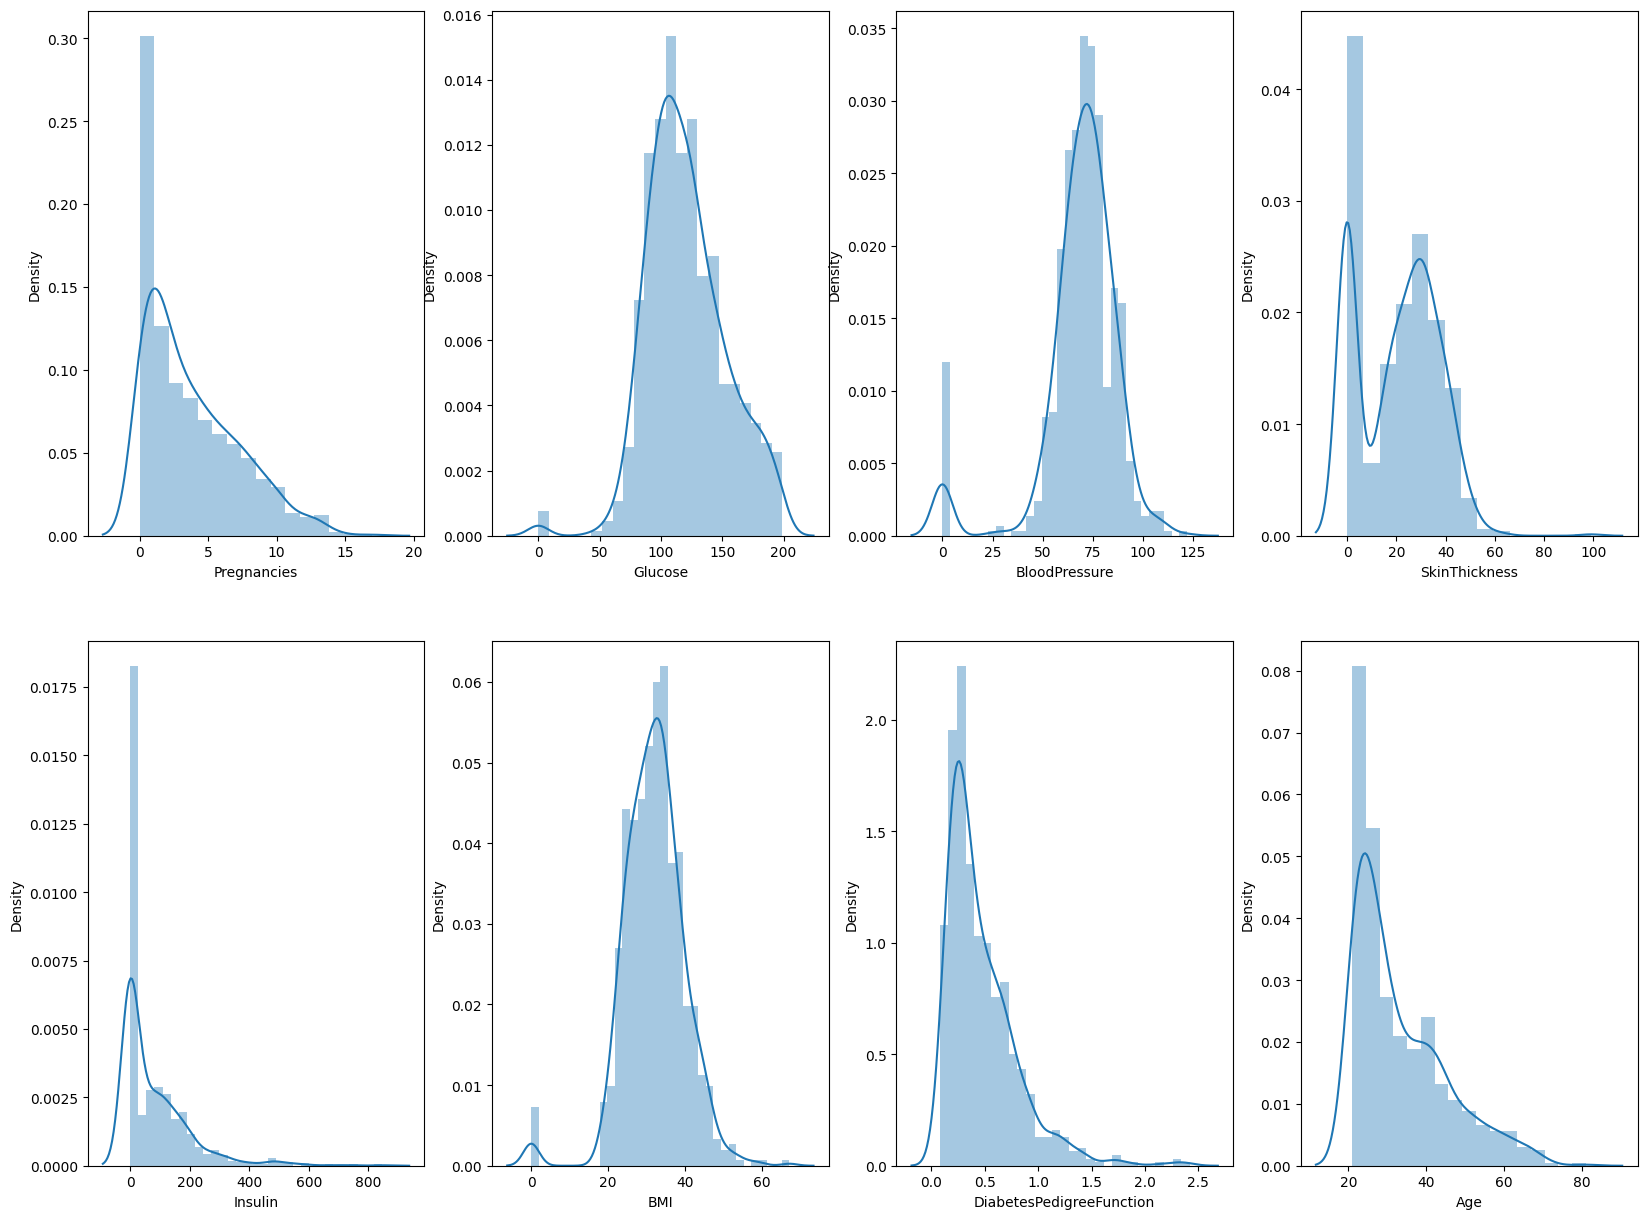

In [11]:
plt.figure(figsize=(20,15))
plt.subplot(2,4,1)
sns.distplot(df['Pregnancies'])
plt.subplot(2,4,2)
sns.distplot(df['Glucose'])
plt.subplot(2,4,3)
sns.distplot(df['BloodPressure'])
plt.subplot(2,4,4)
sns.distplot(df['SkinThickness'])
plt.subplot(2,4,5)
sns.distplot(df['Insulin'])
plt.subplot(2,4,6)
sns.distplot(df['BMI'])
plt.subplot(2,4,7)
sns.distplot(df['DiabetesPedigreeFunction'])
plt.subplot(2,4,8)
sns.distplot(df['Age'])

In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
df['Pregnancies'].replace(0,df['Pregnancies'].median(),inplace=True)
df['Glucose'].replace(0,df['Glucose'].mean(),inplace=True)
df['BloodPressure'].replace(0,df['BloodPressure'].mean(),inplace=True)
df['SkinThickness'].replace(0,df['SkinThickness'].median(),inplace=True)
df['Insulin'].replace(0,df['Insulin'].median(),inplace=True)
df['BMI'].replace(0,df['BMI'].mean(),inplace=True)
df['DiabetesPedigreeFunction'].replace(0,df['DiabetesPedigreeFunction'].median(),inplace=True)
df['Age'].replace(0,df['Age'].median(),inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_2108\1327305480.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pregnancies'].replace(0,df['Pregnancies'].median(),inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_2108\1327305480.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

C:\Users\admin\AppData\Local\Temp\ipykernel_2108\221293323.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pregnancies'])
C:\Users\admin\AppData\Local\Temp\ipykernel_2108\221293323.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Glucose'])
C:\Users\admin\AppData\Local\Temp\ipyker

<Axes: xlabel='Age', ylabel='Density'>

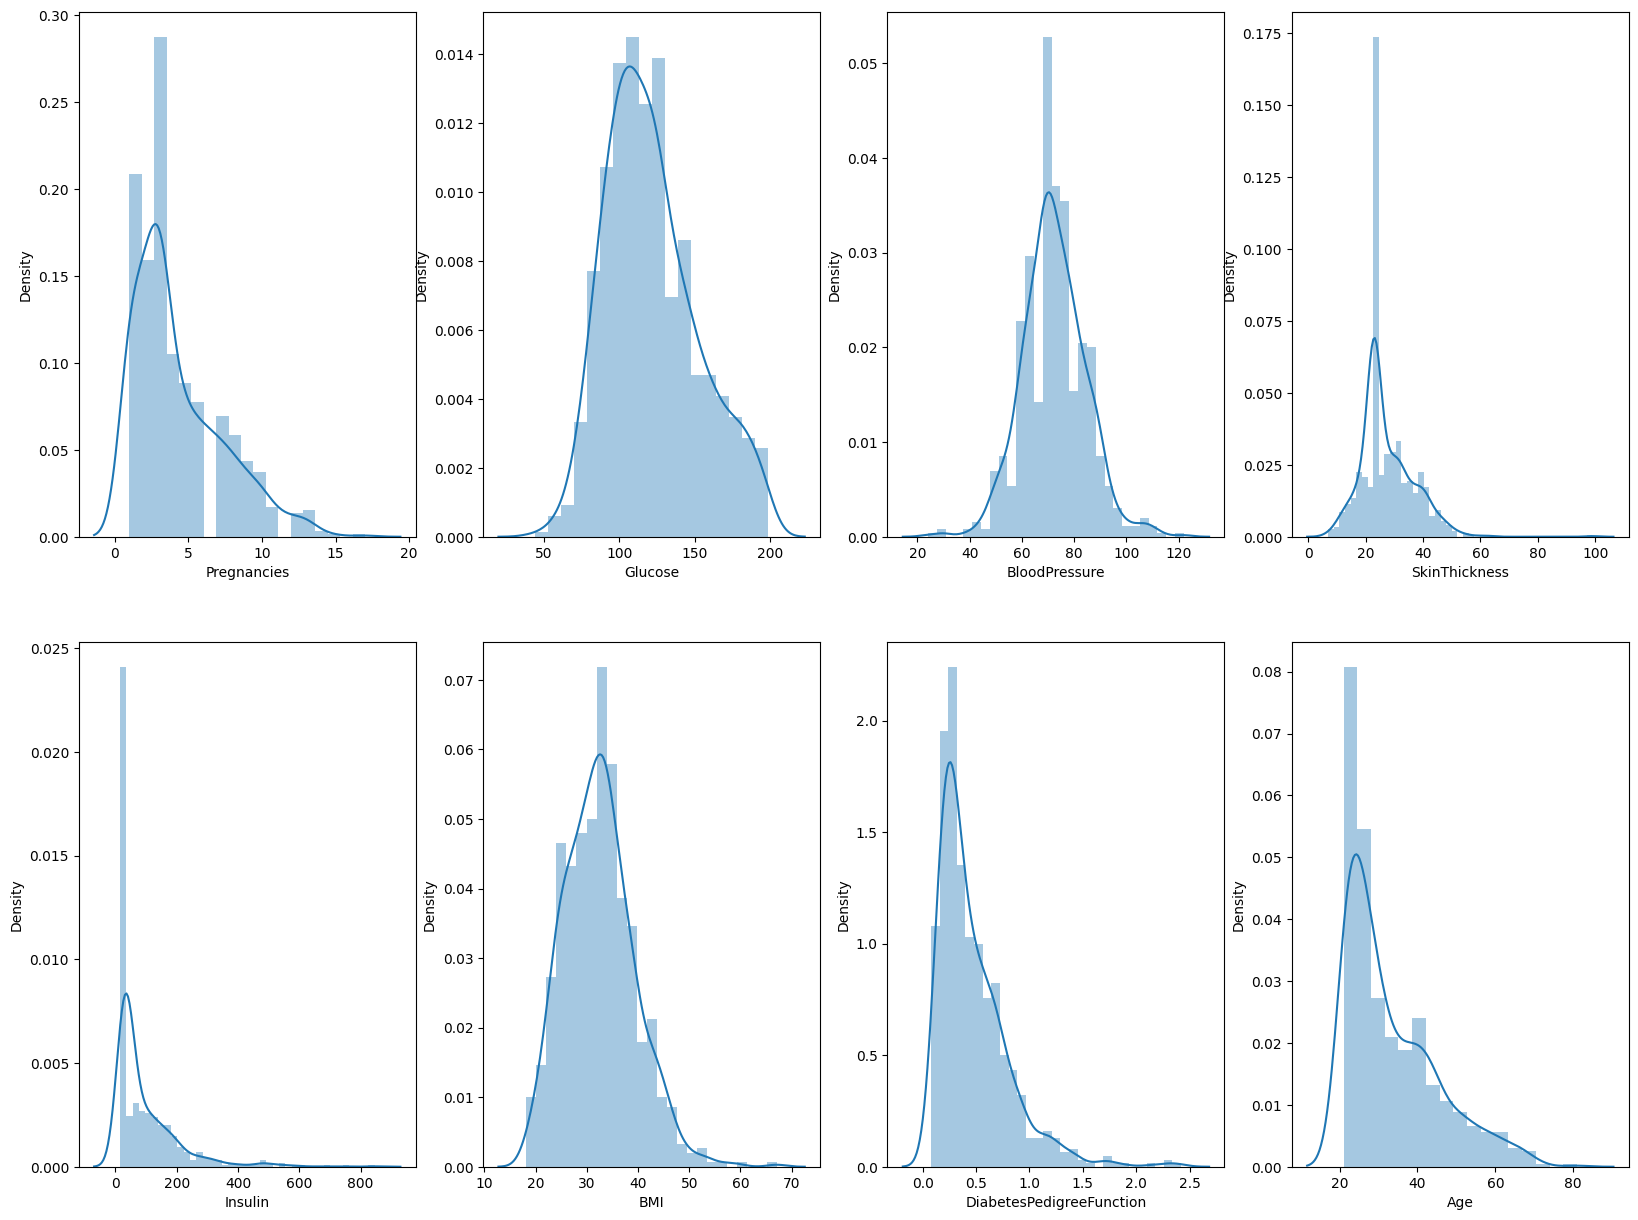

In [14]:
plt.figure(figsize=(20,15))
plt.subplot(2,4,1)
sns.distplot(df['Pregnancies'])
plt.subplot(2,4,2)
sns.distplot(df['Glucose'])
plt.subplot(2,4,3)
sns.distplot(df['BloodPressure'])
plt.subplot(2,4,4)
sns.distplot(df['SkinThickness'])
plt.subplot(2,4,5)
sns.distplot(df['Insulin'])
plt.subplot(2,4,6)
sns.distplot(df['BMI'])
plt.subplot(2,4,7)
sns.distplot(df['DiabetesPedigreeFunction'])
plt.subplot(2,4,8)
sns.distplot(df['Age'])

# Outlier Detection

In [16]:
x=df.drop(columns='Outcome')
y=df['Outcome']

<Axes: >

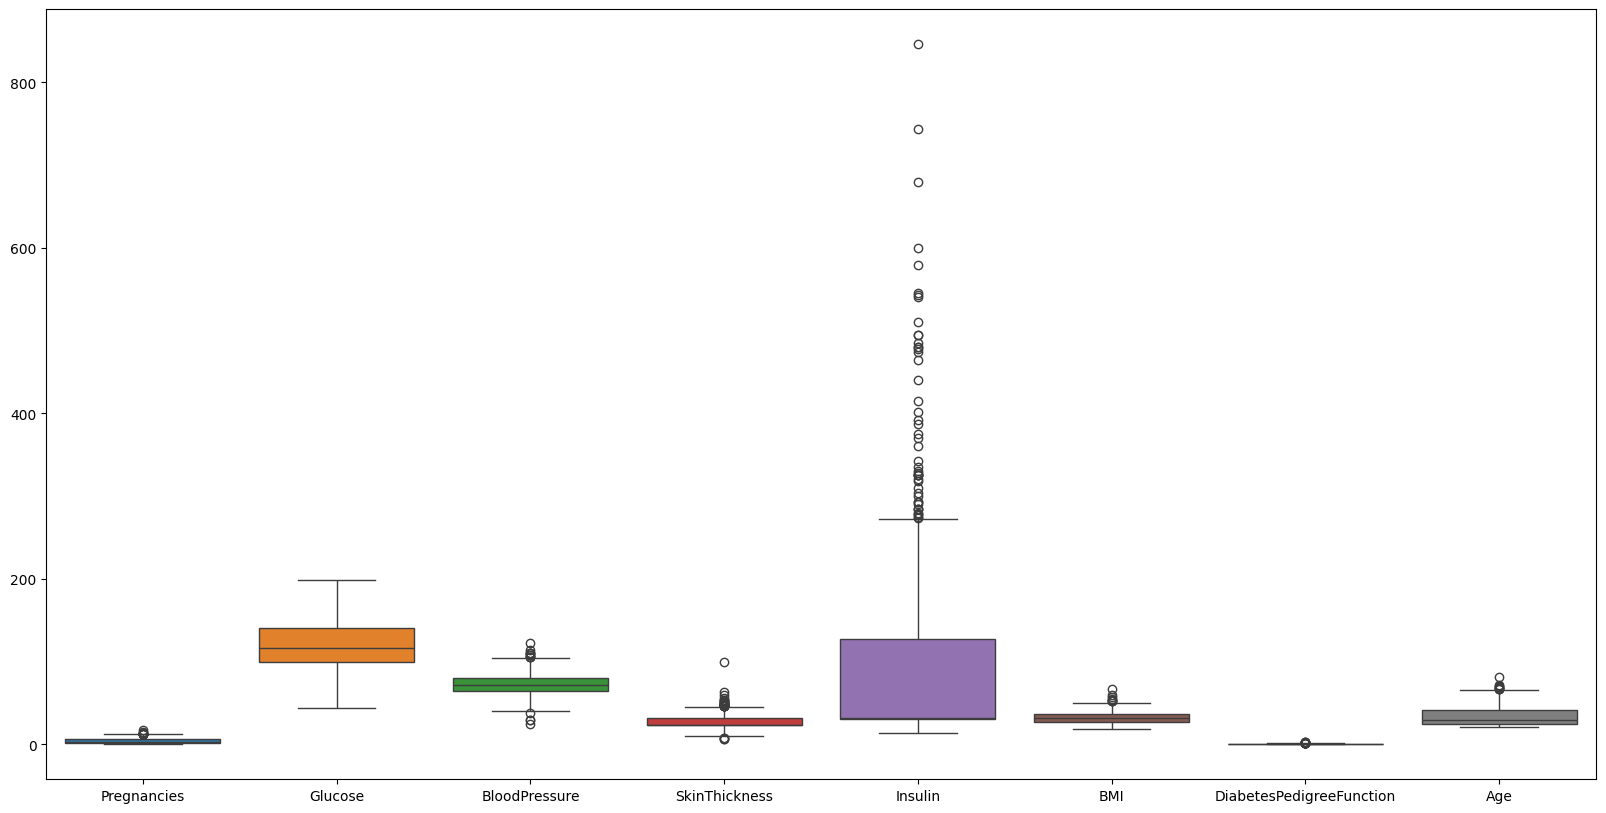

In [17]:
plt.subplots(figsize=(20,10))
sns.boxplot(data=x)

In [18]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [19]:
columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [20]:
x_new=x
y_new=y
for col in columns:
    q3=x[col].quantile(0.75)
    q1=x[col].quantile(0.25)
    iqr=q3-q1
    l_bound=q1-1.5*iqr
    u_bound=q3+1.5*iqr
    mask=(x[col]>=l_bound) & (x[col]<=u_bound)
    x_new=x_new[mask]
    y_new=y_new[mask]

C:\Users\admin\AppData\Local\Temp\ipykernel_2108\56272097.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_new=x_new[mask]
C:\Users\admin\AppData\Local\Temp\ipykernel_2108\56272097.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_new=x_new[mask]
C:\Users\admin\AppData\Local\Temp\ipykernel_2108\56272097.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_new=x_new[mask]
C:\Users\admin\AppData\Local\Temp\ipykernel_2108\56272097.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_new=x_new[mask]
C:\Users\admin\AppData\Local\Temp\ipykernel_2108\56272097.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_new=x_new[mask]
C:\Users\admin\AppData\Local\Temp\ipykernel_2108\56272097.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_new=x_new[mask]
C:\Users\admin\AppData\Local\Temp\

In [21]:
x_new.shape

(628, 8)

In [22]:
y_new.shape

(628,)

In [23]:
# Now let's again store our new data into our original variables
x=x_new
y=y_new
x.shape

(628, 8)

<Axes: >

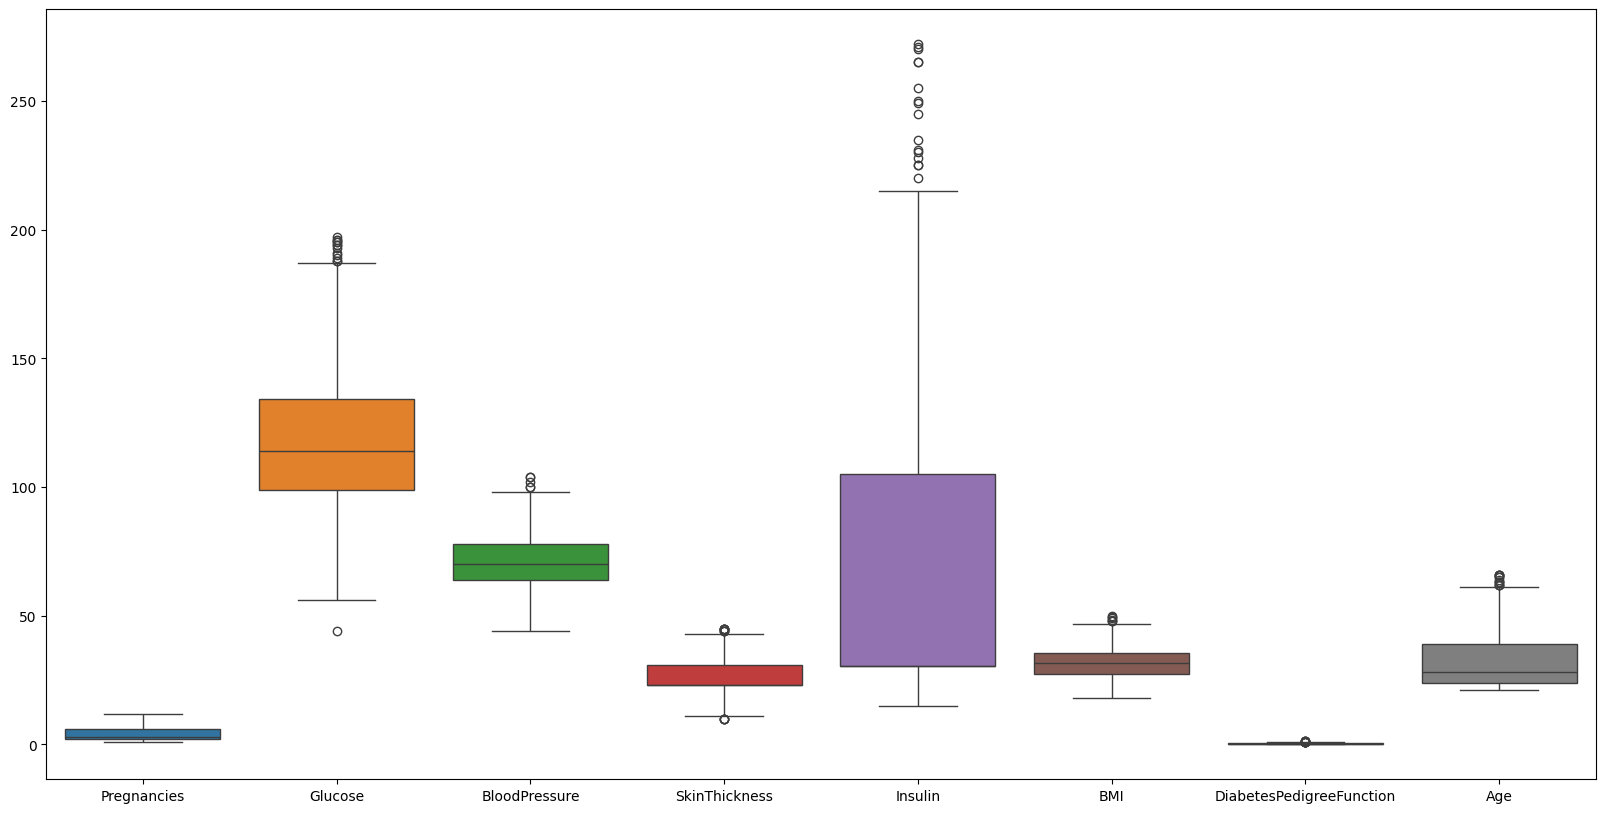

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(x)

# Scaling

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [36]:
print(x_train.shape)
print(x_test.shape)

(439, 8)
(189, 8)


In [39]:
y_train.value_counts()
# We can clearly see that there is a data imbalancing

Outcome
0    302
1    137
Name: count, dtype: int64

In [40]:
!pip install imblearn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_train,y_train=smote.fit_resample(x_train,y_train)
y_train.value_counts()

Outcome
0    302
1    302
Name: count, dtype: int64

# Model Training and Prediction

In [43]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1])

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.746031746031746

In [47]:
from sklearn.metrics import classification_report
target_names=['Non-Diabetic','Diabetic']
classification_report(y_test,y_pred,target_names=target_names)

'              precision    recall  f1-score   support\n\nNon-Diabetic       0.83      0.78      0.81       129\n    Diabetic       0.59      0.67      0.62        60\n\n    accuracy                           0.75       189\n   macro avg       0.71      0.72      0.72       189\nweighted avg       0.76      0.75      0.75       189\n'

# Saving the model

In [49]:
import pickle
pickle.dump(model,open('classification_model','wb'))

In [51]:
model=pickle.load(open('classification_model','rb'))
model.predict(x_test)

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1])